# The van der Waals Model
Let's begin by plotting the van der Waals model for a fluid with attactive potential and minimum volume.

$$P =  \frac{NkT}{V-Nb}-\frac{aN^2}{V^2}$$

But let's put it in molar units. This will change the units of $a$ and $b$ from those used in the textbook.

$$P =  \frac{nRT}{V-nb}-\frac{an^2}{V^2}$$

The values of $a$ and $b$ correspond to nitrogen from https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page). We are plotting for $n = 1$ mole and the parametrized ($P/P_c$ and $V/V_c$) values.

This is figure 5.20 in the textbook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Pc= 33.5 atm Vc= 0.0001 m^3 Tc= 126.2 K


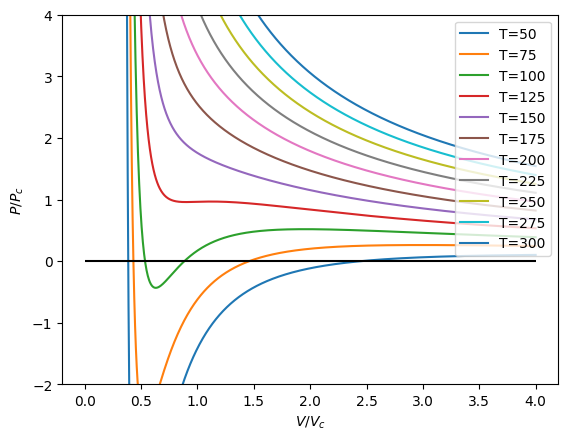

In [ ]:
a = 0.137 #4e-49
b = 0.0387e-3 #6e-29
k = 8.314 #1.381e-23
N = 1 #6.02e23
Vc = 3*N*b
Pc = a/27/b**2
Tc = 8*a/27/b/k
print('Pc=', '{0:0.1f}'.format(Pc/1.01e5), 'atm', 'Vc=', '{0:.4f}'.format(Vc), 'm^3', 'Tc=', '{0:0.1f}'.format(Tc), 'K')

V = np.linspace(1.1*N*b, 4*Vc, 1000)
T = np.linspace(50, 300, 11)
VT = np.meshgrid(V, T)

for i in T:
  P = N*k*i/(V-N*b)-a*N**2/V**2
  temp = str(int(i))
  plt.plot(V/Vc, P/Pc, label='T='+temp)

plt.xlabel(r'$V/V_c$')
plt.ylabel(r'$P/P_c$')
plt.hlines(0, N*b, 4, colors='k', linestyles='solid')
plt.ylim(-2, 4)
plt.legend(loc=1)
plt.show()

We can see the critical point where gas and liquid coexist is nearly along the isotherm at 125 K. Above this temperature, the curves begin to look more ideal gas-like.

Now, let's plot the Gibbs energy vs. pressure like figure 5.21 in the textbook. Starting from the thermodynamic identity

$$dG = -S dT + V dP +\mu dN$$

Assume fixed temperature and number of particles. The Gibbs energy will change with volume as

$$\left(\frac{\partial G}{\partial V}\right)_{N,T} = V\left(\frac{\partial P}{\partial V}\right)_{N,T}$$

Substituting the van der Waals pressure and taking its derivative with respect to volume

$$\begin{align}
\left(\frac{\partial G}{\partial V}\right)_{N,T} &= V\left(\frac{\partial}{\partial V}\left(\frac{NkT}{V-Nb}-\frac{aN^2}{V^2}\right)\right)\\
&= -\frac{NkTV}{(V-Nb)^2} + \frac{2aN^2}{V}
\end{align}$$

We can integrate to find $G$ as a function of $V$.

$$\begin{align}
dG &=  \left(-\frac{NkT(V-Nb)}{(V-Nb)^2} -\frac{Nb}{(V-Nb)^2} + \frac{2aN^2}{V}\right)dV
\end{align}$$

and we get

$$G = -NkT \ln\left(V-Nb\right) + \frac{\left(NkT\right))\left(Nb\right)}{V-Nb} - \frac{2aN^2}{V}$$

We will "zoom in" near the critical temperature and see how where the Gibbs energy has equal values at particular pressures. This is where the horizontal lines are drawn in figurer 5.23.

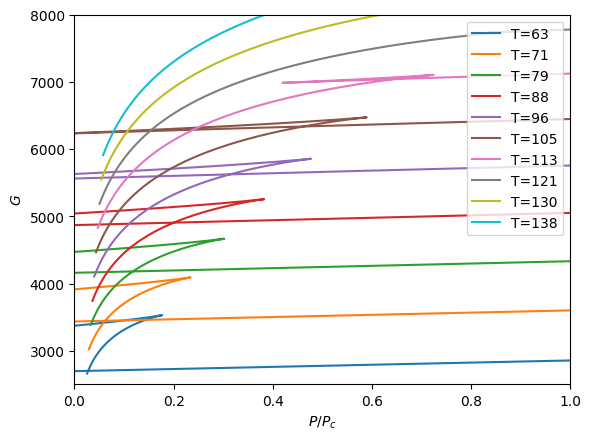

In [ ]:
V = np.linspace(1.1*N*b, 50*Vc, 10000)
T = np.linspace(0.5*Tc, 1.1*Tc, 10)
for i in T:
  P = N*k*i/(V-N*b)-a*N**2/V**2
  G = -N*k*i*np.log(V-N*b) + N*k*i*N*b/(V-N*b) - 2*a*N**2/V
  temp = str(int(i))
  plt.plot(P/Pc, G, label='T='+temp)

plt.xlabel(r'$P/P_c$')
plt.ylabel(r'$G$')
plt.xlim(0.0, 1.0)
plt.ylim(2500,8000)
plt.legend(loc=1)
plt.show()

If we know the pressure where the Gibbs crosses, we can use the `sympy` solver to find the volumes that correspond to this pressure. For lower temperatures, there will be three volume crossing points corresponding to equal Gibbs.

$$P - \frac{nRT}{V-nb}+\frac{an^2}{V^2} = 0$$

Once you have found a pressure crossing point, enter it and the temperature into the solver to get the volumes.

In [ ]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')
#solve(0.0278*Pc-N*k*63/(x-N*b)+a*N**2/x**2, x)
#solve(0.0619*Pc-N*k*71/(x-N*b)+a*N**2/x**2, x)
#solve(0.4618*Pc-N*k*105/(x-N*b)+a*N**2/x**2, x)
#solve(0.647*Pc-N*k*113/(x-N*b)+a*N**2/x**2, x)
solve(0.85*Pc-N*k*121/(x-N*b)+a*N**2/x**2, x)

[8.14825510036523e-5 - 0.e-27*I,
 0.000123301059705223 + 0.e-27*I,
 0.00018325098056824 - 0.e-25*I]

The values found are

|  P/Pc  |   T   |   VL   |   VR   |
|--------|-------|--------|--------|
| 0.02778|  63   | 4.72e-5| 0.0053 |
| 0.0619 |  71   | 4.09e-5| 0.0026 |
|        |  79   |        |        |
|        |  88   |        |        |
|        |  96   |        |        |
| 0.4618 | 105   | 6.26e-5| 0.0004 |
| 0.647  | 113   | 6.92e-5| 0.00027|
| 0.85   | 121   | 8.15e-5| 0.000183|

The last one at 121K seems off to me.

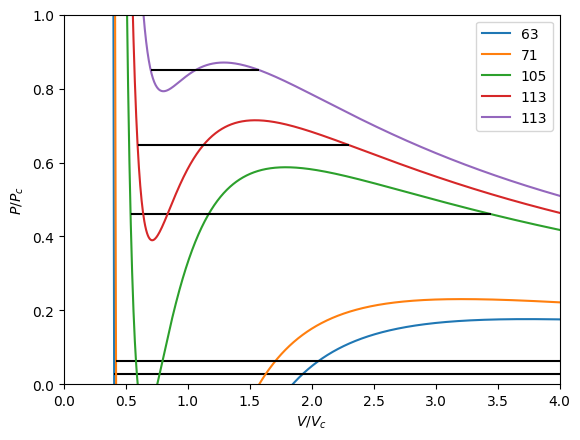

In [ ]:
V = np.linspace(1.1*N*b, 4*Vc, 1000)
P = N*k*63/(V-N*b)-a*N**2/V**2
plt.plot(V/Vc, P/Pc, label='63')
plt.hlines(0.0278, 4.72e-5/Vc, 0.0053/Vc, colors='k')

P = N*k*71/(V-N*b)-a*N**2/V**2
plt.plot(V/Vc, P/Pc, label='71')
plt.hlines(0.0619, 4.901e-5/Vc, 0.0026/Vc, colors='k')

P = N*k*105/(V-N*b)-a*N**2/V**2
plt.plot(V/Vc, P/Pc, label='105')
plt.hlines(0.4618, 6.26e-5/Vc, 0.0004/Vc, colors='k')

P = N*k*113/(V-N*b)-a*N**2/V**2
plt.plot(V/Vc, P/Pc, label='113')
plt.hlines(0.647, 6.92e-5/Vc, 0.000267/Vc, colors='k')

P = N*k*121/(V-N*b)-a*N**2/V**2
plt.plot(V/Vc, P/Pc, label='113')
plt.hlines(0.85, 8.15e-5/Vc, 0.000183/Vc, colors='k')

plt.xlabel(r'$V/V_c$')
plt.ylabel(r'$P/P_c$')
#plt.hlines(0, N*b, 4, colors='k', linestyles='solid')
plt.xlim(0, 4)
plt.ylim(0,1)
#plt.ylim(-2, 4)
plt.legend(loc=1)
plt.show()

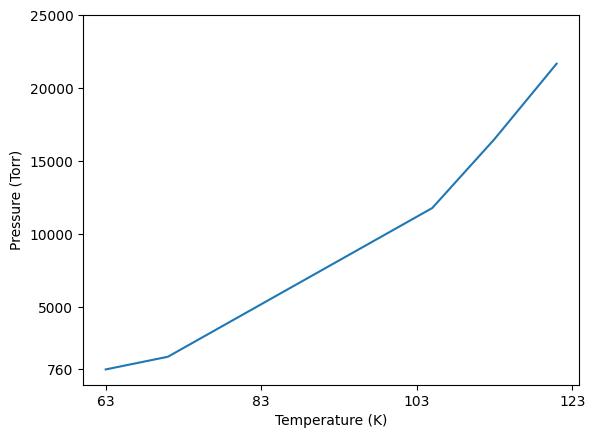

In [ ]:
Pfound = np.array([0.02778, 0.0619, 0.4618, 0.647, 0.85])
Tfound = np.array([63, 71, 105, 113, 121])
plt.plot(Tfound, Pfound*Pc*760/1.01e5)
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (Torr)')
plt.xticks([63, 83, 103, 123])
plt.yticks([760, 5000, 10000, 15000, 20000, 25000])
plt.show()

The actual nitrogen phase diagram is shown below. The van der Waals model reproduces the liquid gas phase transition line between the triple point and the critical point.

<img src="https://d2nchlq0f2u6vy.cloudfront.net/20/10/19/697726d7e5fcdc83c6975a5e6d3f7cc6/5fbda2842ea7c0dcb74b79c4ccd5009e/image_scan.png">